416.6 300


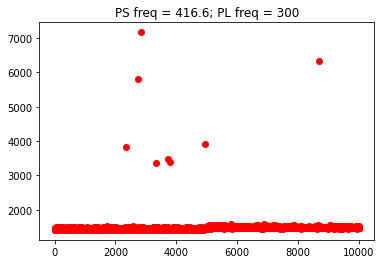

1499 100


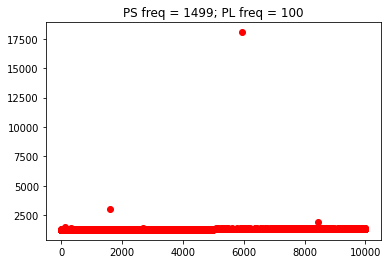

416.6 187.5


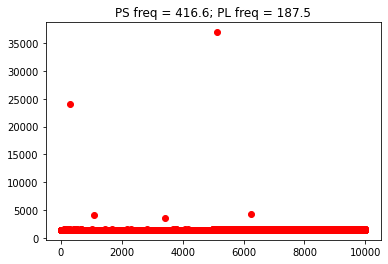

1499 187.5


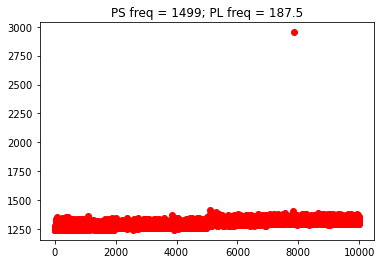

1499 300


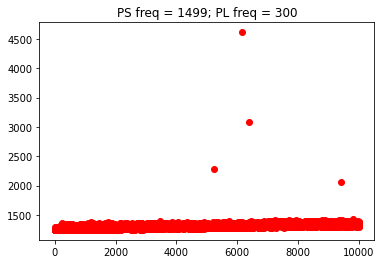

416.6 100


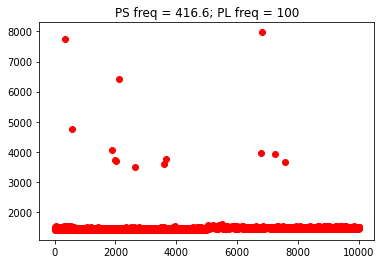

999 187.5


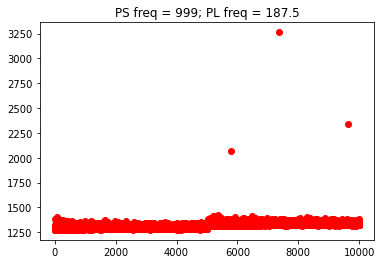

999 300


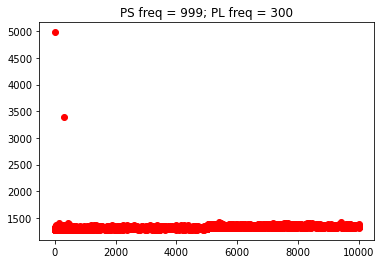

999 100


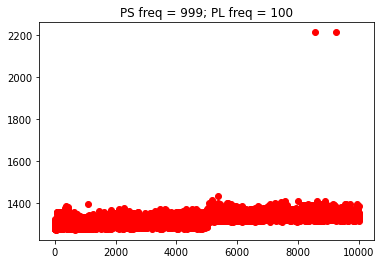

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import os

directory = "../app/rpts"
files = os.listdir(directory)

ps_freqs = [1499, 999, 416.6]
pl_freqs = [300, 187.5, 100]

for file in files:
    #file = files[0]

    from numpy import genfromtxt
        
    my_data = genfromtxt(directory + "/" + file, delimiter=',')
    if("cdma" in file):
        freqs = file.split('.')[0].split('_')[-2:]
        ps_freq = ps_freqs[int(freqs[0])]
        pl_freq = pl_freqs[int(freqs[1])]
        print(ps_freq, pl_freq)

        plt.title("PS freq = " + str(ps_freq) + "; PL freq = " + str(pl_freq))
    
        x = [i[0] for i in my_data[1:]]

        #y = [i[1] if i[1] < 2000 else 1500 for i in my_data[1:]]
        y = [i[1] for i in my_data[1:]]

        plt.plot(x, y, 'or')
        plt.savefig("cdma" + str(ps_freq) + str(pl_freq) + ".jpg")
        plt.show()

['minarray.csv', 'maxarray.csv']


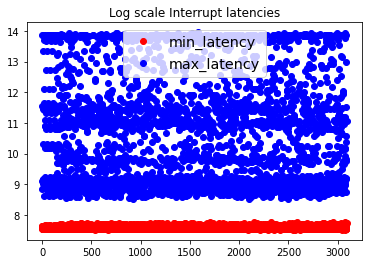

In [4]:
import os
directory = "../app/rpts"
files = [i for i in os.listdir(directory ) if 'array' in i ]

print(files)

max_array = []
min_array = []

fig, ax = plt.subplots()

for file in files:
    #file = files[0]

    from numpy import genfromtxt
        
    my_data = genfromtxt(directory + "/" + file, delimiter=',')
    my_data = [np.log(i) for i in my_data]
    #x = [i[0] for i in my_data[1:]]
    #y = [i[1] if i[1] < 2000 else 1500 for i in my_data[1:]]
    if "min" in file:
        #print(my_data)
        ax.plot(range(len(my_data)),my_data, 'or', label="min_latency")
    else:
        ax.plot(range(len(my_data)),my_data, 'ob', label="max_latency")

plt.title("Log scale Interrupt latencies")
legend = ax.legend(loc='upper center', shadow=False, fontsize='x-large')
plt.savefig("min_max_intr_latency.jpg")
plt.show()

